<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_4_2_%EB%B9%84%EC%9D%8C%EC%88%98_%ED%96%89%EB%A0%AC_%EB%B6%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b0b9294a58cb048275a4175f50168cd00d57e33d018d936c589037b58b6bed61
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.4.2 비음수 행렬 분해

특성뽑아낸다. 비지도 알고리즘, 차원축소에도 사용, 가중치 합으로 각 데이터 포인트 나타냄. PCA와 다르게 NMF는 분산이 적고, 음수가 아닌 성분과 계수값을 찾는다. 즉 주성분과 계수가 모두 0보다 크거나 같아야 한다.

\
주로 오디오 트랙과 같이 여러 악기로 이루어진 음악 데이터에 이용한다.

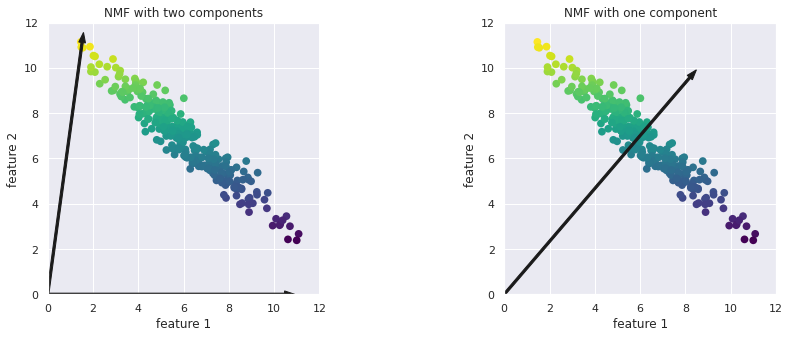

In [3]:
mglearn.plots.plot_nmf_illustration()

NMF를 다루려면 주어진 데이터가 양수인지 확인해야 한다. 다른 말로 원점에서 데이터가 어디에 놓여있는지 알아야 된다는 의미. 
**그림** 왼쪽은 성분이 2개 오른쪽은 성분이 1개 일때이다. 하나의 성분만 사용한다면 평균으로 향하는 성분을 만들고, 많다면 각 특성 끝에 위치한 포인트를 가르킨다. 
PCA와 다르게 주성분은 없다. 모든 성분을 동등하게 취급한다. NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라진다.

\
### 얼굴 이미지에 NMF 적용하기

LFW 데이터셋에 NMF를 적용하기
NMF 를 사용해 데이터를 재구성하는 데 성분의 개수가 어떤 영향을 주는지 살펴본다.

In [4]:
from IPython.core.pylabtools import figsize
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255  ## 맞나??
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))
_____________________________________________________nmf_faces - 605.7s, 10.1min


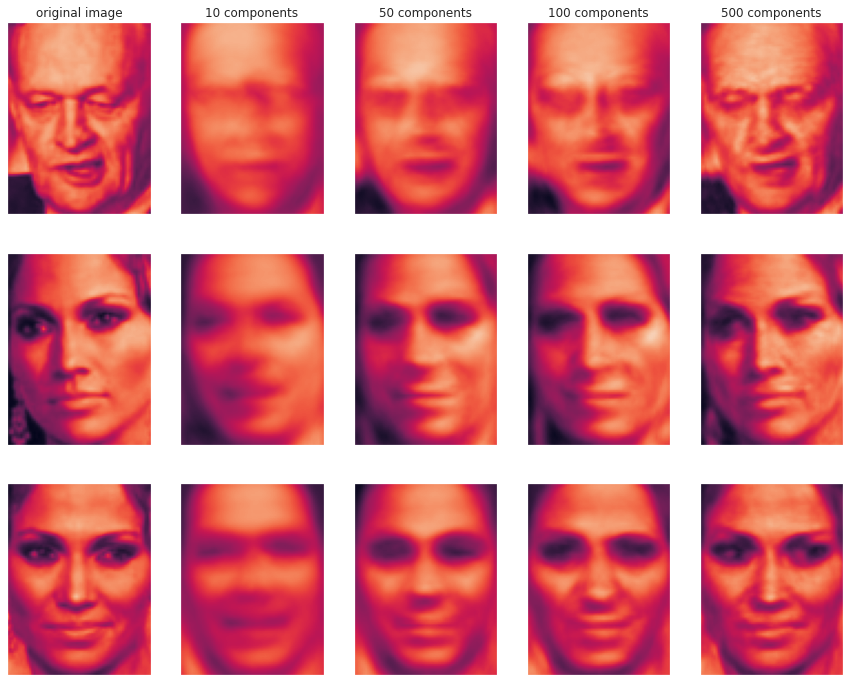

In [5]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

PCA 보다 품질이 조금 떨어짐. PCA는 주성질을 이용하기에 다른 듯함. NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기 보단 데이터에 있는 유용한 패턴을 찾는데 활용해야 할듯

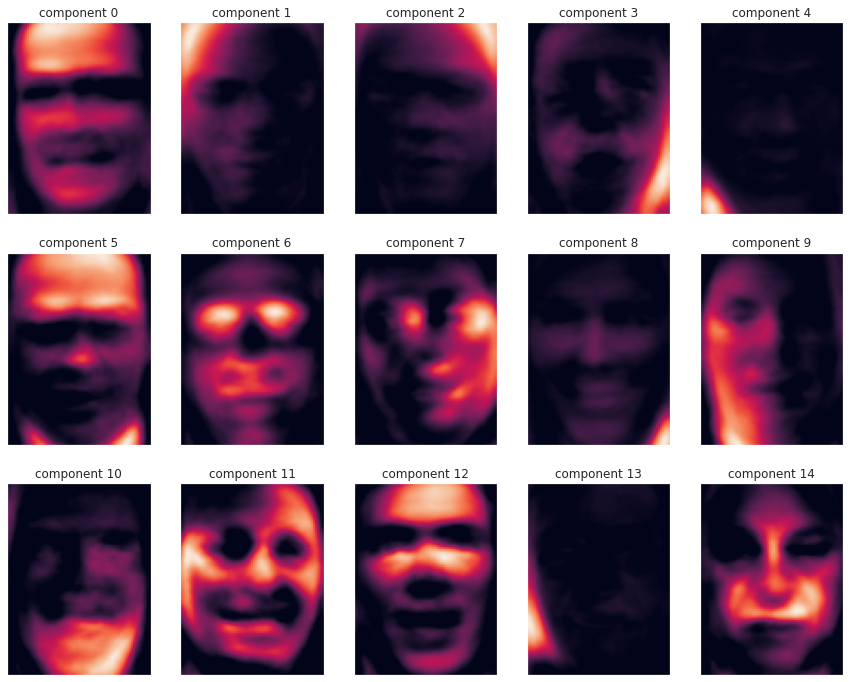

In [6]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title('component {}'.format(i))

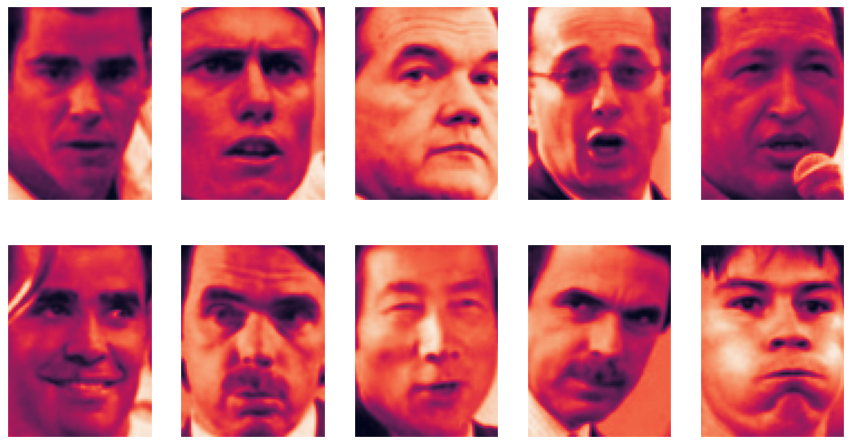

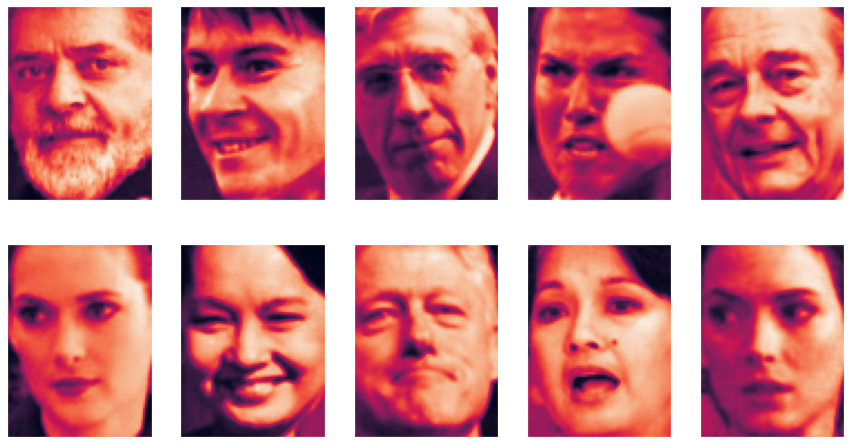

In [7]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

# 4 > 오른쪽으로 돌아감
# 8 > 왼쪽으로 돌아감

# 즉, 패턴 추출


Text(0, 0.5, 'signal')

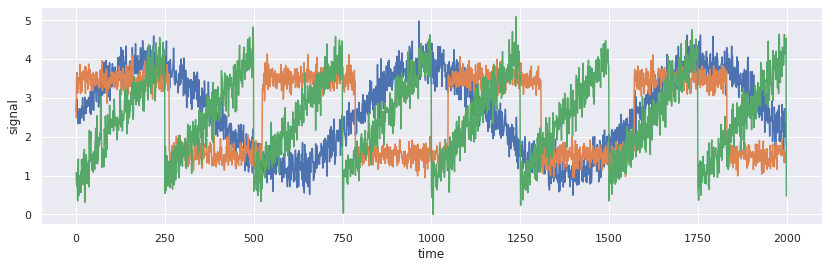

In [8]:
# 세 개의 서로다른 입력으로 부터 함성된 신호

S = mglearn.datasets.make_signals()
plt.figure(figsize=(14,4))
plt.plot(S, '-')
plt.xlabel('time')
plt.ylabel('signal')

만약 원본 신호는 볼 수 없고 이 세 개가 섞인 신호만 관찰할 수 있는 상황이다.
합쳐진 신호를 분해해 원본 신호를 복원해야 한다.
이 신호를 여러방법으로 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다.


In [9]:
# 원본 데이터 사용, 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [10]:
# NMF 를 사용 세 개의 신호 복원
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [11]:
# 비교를 위한 PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

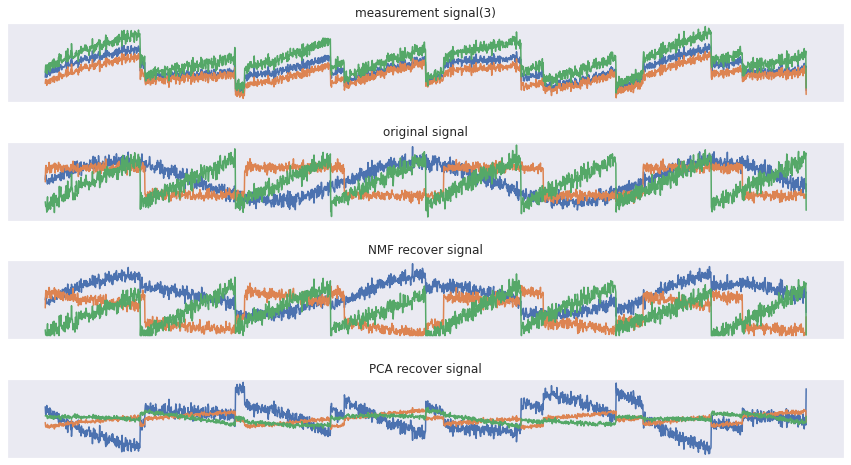

In [12]:
models = [X, S, S_, H]
names = ['measurement signal(3)', 'original signal', 'NMF recover signal', 'PCA recover signal']

fig, axes = plt.subplots(4, figsize=(15, 8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks':()})

for model, name, ax in zip(models, names, axes):
  ax.set_title(name)
  ax.plot(model[:, :3], '-')

PCA 대비 좋은 성능을 냈지만 NMF는 성분 순서가 없음을 유의해야한다.
세 커브의 겹쳐진 순서를 보자.
그 밖에도 패턴 추출은 / 독립성분분석 ICA / 희소코딩에 관해 설명하고 있는 [scikit-learn 사용자 가이드](https://scikit-learn.org/stable/modules/decomposition.html) 를 참고하자

## 3.4.3 t-SNE를 이용한 매니폴드 학습
데이터를 산점도로 시각화 할 수 있다는 이점으로 PCA가 종종 데이터 변화에 가장 먼저 시도해볼 만한 방법이지만, 회전하고 방향을 제거하는 태생상 유용성이 떨어진다. **매니폴드 학습** 알고리즘, 시각화 알고리즘들은 훨씬 봅잡한 맵핑을 만들어 더 나은 시각화를 제공한다. 특별히 t-SNE 알고리즘을 아주 많이 사용한다.


\
매니폴드 학습 알고리즘은 그 목정이 시각화라 3개 이상의 특성을 뽑은 경우는 거의 없다. 즉. 테스트 셋에서는 적용할 수 없고, 단지 훈현했던 데이터만 변환할 수 있다. 지도학습용으로는 거의 시용하지 않는다.
t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다. 가까이 있는 포인트에 더 많은 비중으 둔다. 다시 말해, 이웃 데이터 포인트에 대한 정보를 보존하려 노력한다.

\
다음은 손글씨 숫자 데이터셋에 t-SNE 매니폴드 학습을 적용해 보겠다. 데이터셋의 각 포인트는 0에서 9 사이의 손글씨 숫자를 표현한 8X8 크기의 흑백 이미지다.

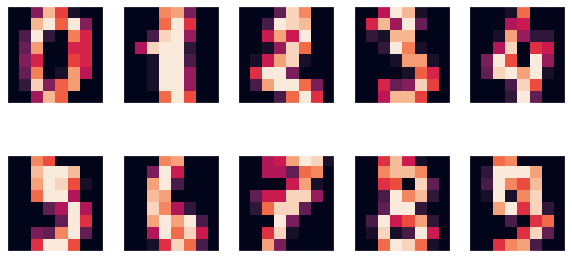

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
  ax.imshow(img)


Text(0, 0.5, 'pcomp 2')

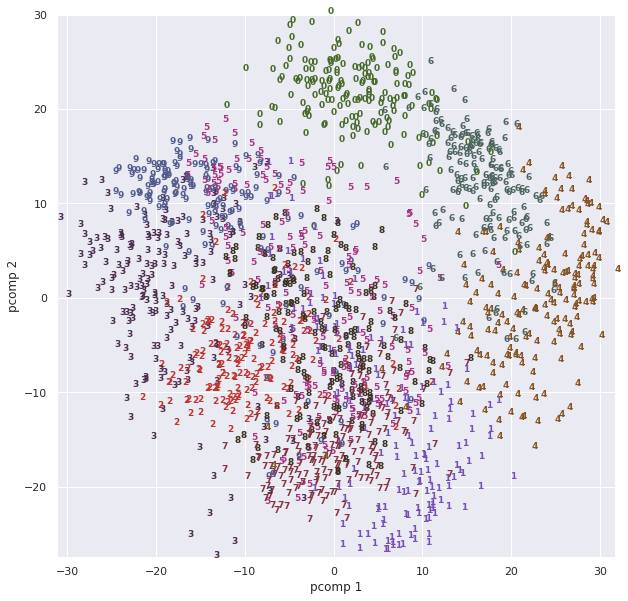

In [14]:
# PCA를 사용해 데이터를 2차원으로 축소해 시각화하겠다. 차음 두 개의 주성분을 이용해 그래프를 그리고
# 각 샘플을 해당하는 클래스의 숫자로 나타냈다.

# PCA 모델을 생성
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개으 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E" ]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
# 숫자 텍스트를 이용해 산점도를 그린다.
for i in range(len(digits.data)):
  plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
           color = colors[digits.target[i]], fontdict={'weight':'bold','size': 9})
plt.xlabel("pcomp 1")
plt.ylabel("pcomp 2")
  
# 0,6,4 는 잘 불리되었으나 다른 숫자들은 대부분 중첩된 부분이 있다

Text(0, 0.5, 't-SNE feature 2')

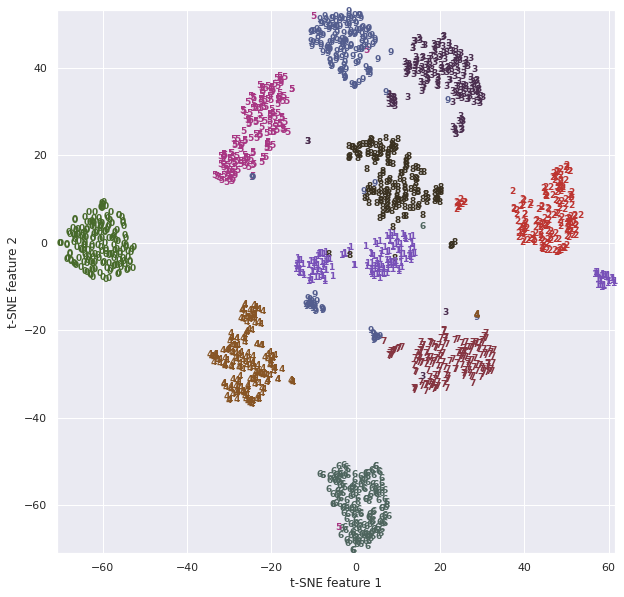

In [15]:
# t-SNE와 비교

# 사이킷런 1.2 버전엔 TSNE의 init 매개변수 기본값이 'random'에서 'pca'로 바뀌고
# learning_rate 매개변수 기본값이 200.0에서 'auto'로 바뀔 예정

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에 transform 메서드가 없으므로 대신 fit_tranform을 사용
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)

for i in range(len(digits.data)):
  plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
           color = colors[digits.target[i]], fontdict={'weight':'bold','size': 9})

plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")

모든 클래스가 확실히 잘 구분되었다. 1과 9는 조금 나뉘었지만 대부분의 숫자는 하나의 그룹으로 모여있다.

t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다.
perplexity 와 _exaggeration를 변경해볼 수 있지만 보통 효과는 크지 않다.

\
## 3.5 군 집

군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업니다. 한 클러스트 안 데이터 포인트끼리는 매우 비숫하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표이다.

분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 얼느 클러스터에 속하는지 할당 또는 예측한다.

\
#### 3.5.1 k-평균 군집

k-평균 군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘이다.이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다.

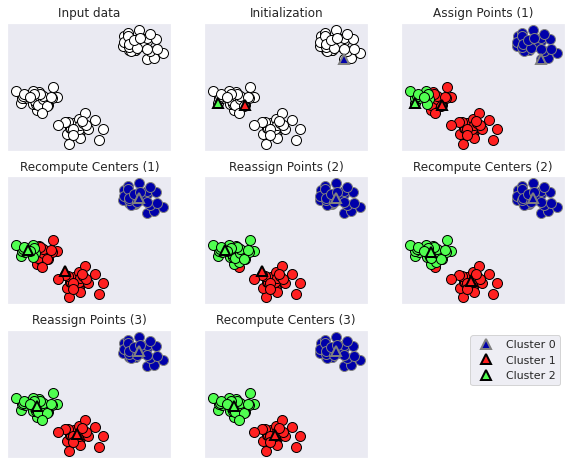

In [16]:
mglearn.plots.plot_kmeans_algorithm()

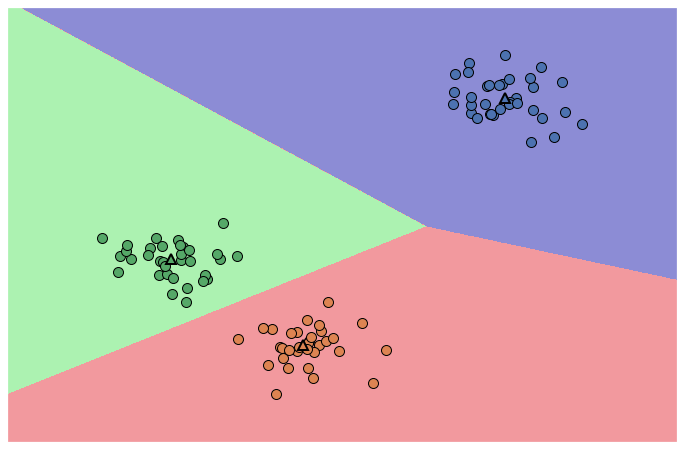

In [17]:
# 위에서 학습시킨 클러스터 중심의 경계이다
mglearn.plots.plot_kmeans_boundaries()

In [18]:
# KMeans 의 객체생성 찾고자하는 클러스터의 수를 지정

from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 만든다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

# 3개로 지정했기 때문에 0~2까지 생성

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [20]:
# 예측
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


알고리즘이 우리에게 주는 정보에서 숫자는 의미가 없다. 한명의 사진을 3가지로 나눌 수도 있다. 그저 동일한 숫자는 모두 서로 비슷하다는 의미이다. 이는 사진을 직접봐야 한다.
2차원 예제에서도 0,1로 지정되는 건 중요하지 않다. 초기화를 무작위호 하기 때문에 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있다

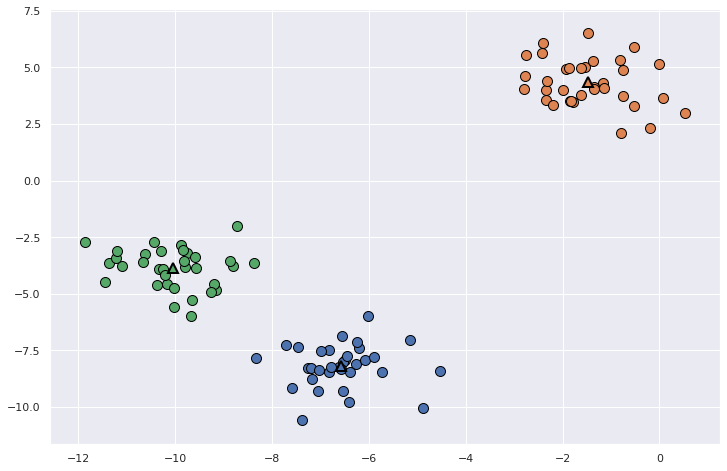

In [21]:
# 그래프를 그리고 cluster_centers_ 속성에 저장된 클러스터 중심을 삼각형으로 표시한다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=2)

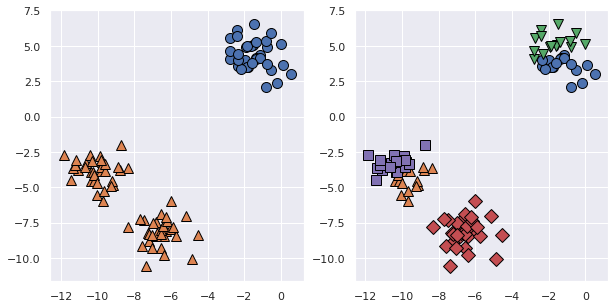

In [22]:
# 클러스터 수를 늘리거나 줄여봄
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

k 평균알고리즘의 한계

k-평균 알고리즘은 비교적 간단한 형태를 구분할 수 있다. 또한 k-평균은 모든 틀러스터의 반경이 똑같다고 가정한다. 그래서 클러스터 중심 사이의 정확히 중간에 경계를 그리는데, 이는 가끔 예상치 않는 결과를 만들기도 한다.

Text(0, 0.5, 'feature 1')

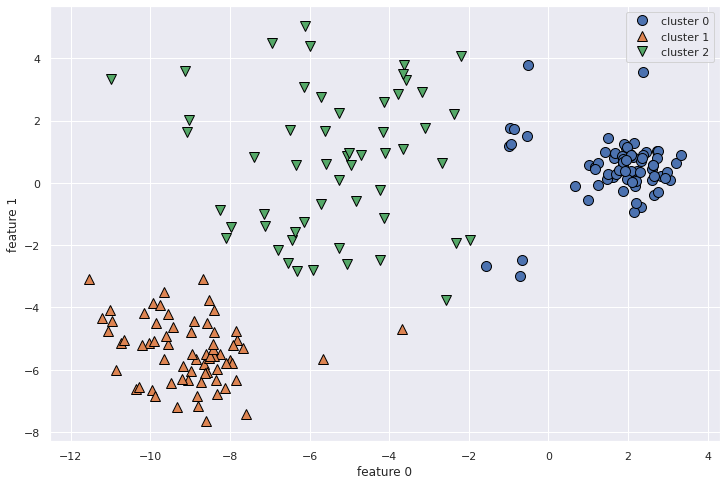

In [23]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

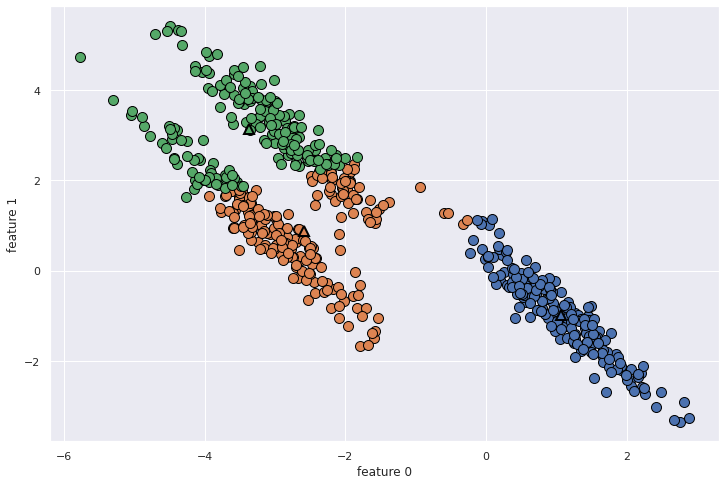

In [24]:
# 무작위로 클러스터 데이터를 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=3)
kmeans .fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

원형이 아닌 클러스터는 구분하지 못한다.
\
클러스터가 2장에서 본 two_moons 데이터처럼 더 복잡한 형태라면 k-평균의 성능이 더 나빠진다.

Text(0, 0.5, 'feature 1')

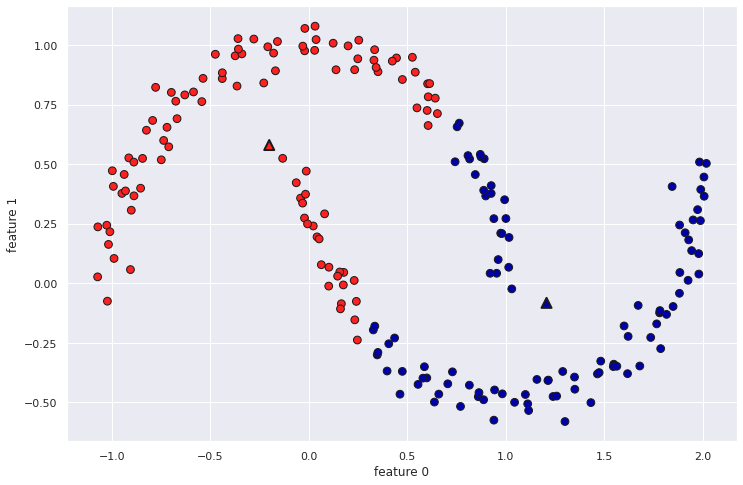

In [25]:
# two_moons 데이터를 생성한다. 이번에는 노이즈를 조금만 넣는다.
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시한다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker= "^",c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### 백터 양자화 또는 분해 메서드로서의 k-평균

PCA, NMF, k-평균은 모두 분해 알고리즘이다.
PCA, NMF는 모두 데이터 포인트를 어떤 성분의 합으로 표현한다.
반면, k-평균은 하나의 성분으로 표현한다. 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화 라고 한다.

\
다음은 PCA, NMF, k-평균에서 추출한 성분과 100개의 성분으로 테스트 셋의 얼국을 재구성 한 것을 나란히 비교해볼 것이다. k-평균의 경우 재구성은 훈련셋에서 찾은 가장 가까운 클러스터의 중심이다.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


Text(0, 0.5, 'nmf')

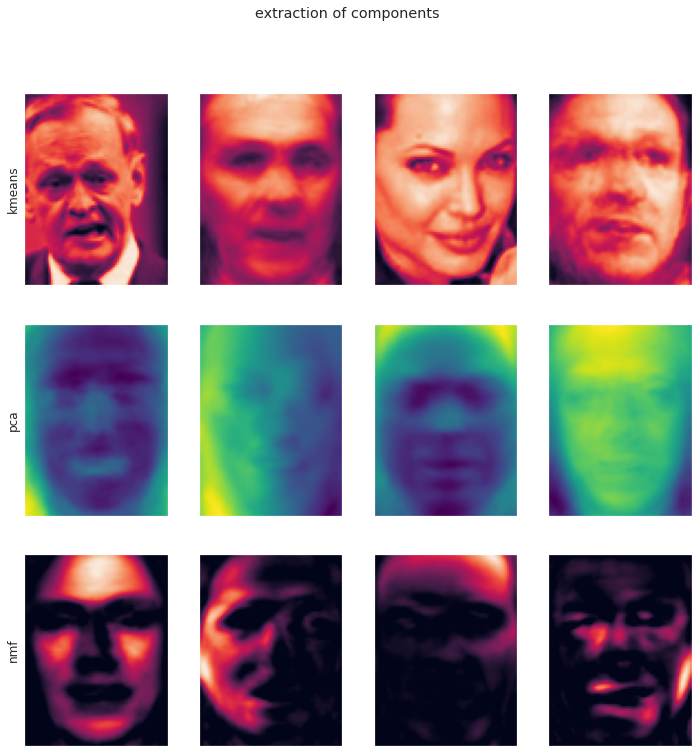

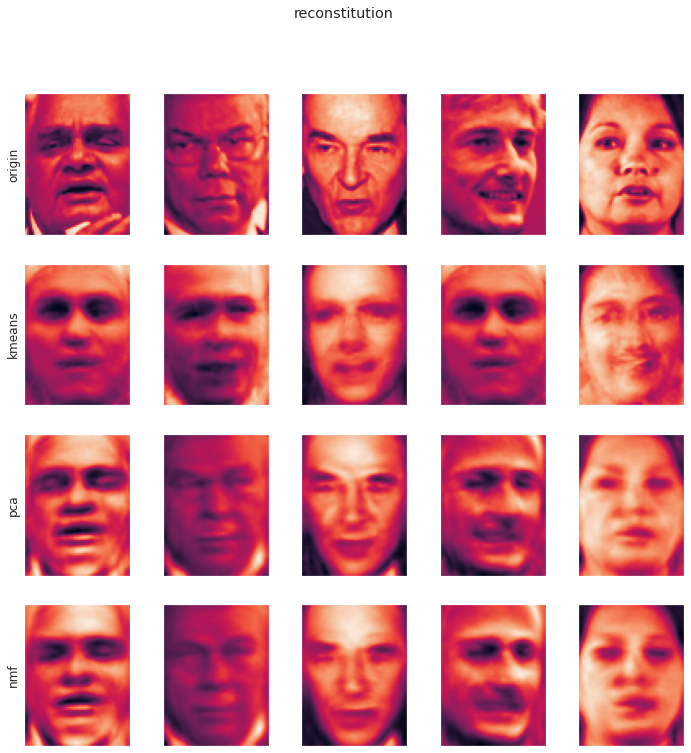

In [27]:
fig, axes = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('extraction of components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
  ax[0].imshow(comp_kmeans.reshape(image_shape))
  ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
  ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

# 재구성
fig, axes = plt.subplots(4, 5, figsize=(12,12), subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle('reconstitution')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test,X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
  ax[0].imshow(orig.reshape(image_shape))
  ax[1].imshow(rec_kmeans.reshape(image_shape))
  ax[2].imshow(rec_pca.reshape(image_shape))
  ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel("origin")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")
